In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer

trade_df = pd.read_csv('/projects/genomic-ml/da2343/ml_project_2/data/EURUSD_H1_2011_2015_TRADES.csv')
# trade_df = trade_df[[ 'MACD', 'MACD_Signal', 'MACD_Hist', 'RSI', 'ADX', 'AROON_Oscillator', 'WILLR', 'label']]
# trade_df = trade_df[['position', 'MACD', 'MACD_Signal', 'MACD_Hist', 'RSI', 'ADX', 'AROON_Oscillator', 'WILLR', 'label']]
# trade_df = trade_df[['position', 'RSI', 'ADX', 'WILLR', 'label']]
trade_df = trade_df[['position', 'RSI', 'ADX', 'WILLR', 'label']]


# reset index
trade_df.reset_index(drop=True, inplace=True)

# add an index column to trade_df
trade_df['index'] = trade_df.index

# save trade_df to csv
trade_df.to_csv('/projects/genomic-ml/da2343/ml_project_2/data/EURUSD_H1_2011_2015_TRADES_binary.csv', index=False)

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer

trade_df = pd.read_csv('/projects/genomic-ml/da2343/ml_project_2/hpc/trade_binary_classifier/out/correlated_attribute_mode/sythetic_data_2.csv')
# drop index column
trade_df = trade_df.drop(columns=['index'])


In [11]:
trade_df

,position,RSI,ADX,label
0,1.0,52.593732,10.174146,1.0
1,1.0,47.746352,25.913020,1.0
2,0.0,44.075429,24.056105,1.0
3,0.0,53.244708,12.306458,1.0
4,0.0,50.499989,12.985351,0.0
...,...,...,...,...
99995,1.0,45.983950,20.877857,1.0
99996,1.0,53.419055,15.962663,0.0
99997,0.0,47.255628,18.477744,1.0
99998,1.0,56.166866,27.284602,1.0


In [9]:
data_dict = {
    'EURUSD_TRADES': (trade_df.iloc[:, :-1].to_numpy(), trade_df.iloc[:, -1] ),
    # 'EURUSD_TRADES_SS': (StandardScaler().fit_transform(trade_df.iloc[:, :-1].to_numpy()), trade_df.iloc[:, -1] ),
    # 'EURUSD_TRADES_PT': (PowerTransformer().fit_transform(trade_df.iloc[:, :-1].to_numpy()), trade_df.iloc[:, -1] ),
}

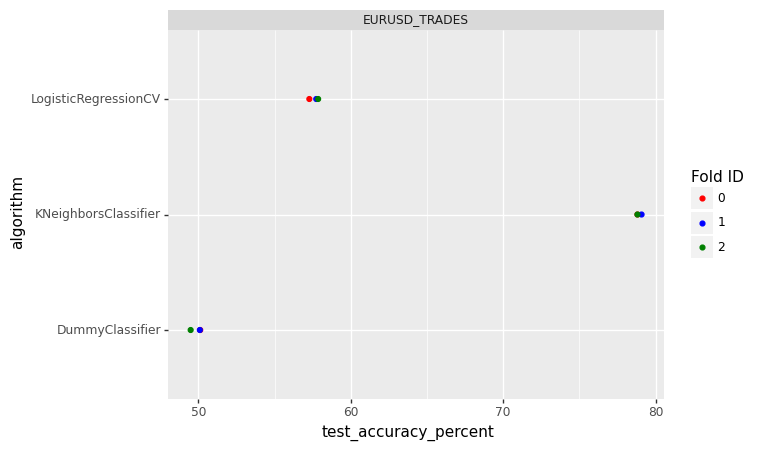

<ggplot: (1401389969728)>

In [10]:
import pandas as pd
import numpy as np
import plotnine as p9
from sklearn.model_selection import *
from sklearn.feature_selection import *
from sklearn.preprocessing import *
from sklearn.pipeline import *

from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.model_selection import *
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import *
import matplotlib.pyplot as plt
import matplotlib
import plotnine as p9

np.set_printoptions(threshold=np.inf)

test_acc_df_list = []


classifier_dict = {
    "KNeighborsClassifier": KNeighborsClassifier(10),
    # "SVC": SVC(kernel="linear", C=0.025),
    # "SVC": SVC(gamma=2, C=1),
    # "GaussianProcessClassifier": GaussianProcessClassifier(1.0 * RBF(1.0)),
    # "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=5),
    # "MLPClassifier": MLPClassifier(),
    # "AdaBoostClassifier": AdaBoostClassifier(),
    # "GaussianNB": GaussianNB(),
    # "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    # "RandomForestClassifier": RandomForestClassifier(),
    'DummyClassifier': DummyClassifier(strategy="uniform"),
    'LogisticRegressionCV': LogisticRegressionCV(cv=3, random_state=0, max_iter=1_000),
    
}

for data_set, (input_mat, output_vec) in data_dict.items():
    kf = KFold(n_splits=3, shuffle=True, random_state=1)
    for fold_id, (train_index, test_index) in enumerate(kf.split(input_mat)):
        X_train, X_test = input_mat[train_index], input_mat[test_index]
        y_train, y_test = output_vec[train_index], output_vec[test_index]

        pred_dict = {}
        # iterate over classifiers
        for name, clf in classifier_dict.items():
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            pred_dict[name] = y_pred
        
        for algorithm, y_pred in pred_dict.items():
            tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
            tn_accuracy = tn / (tn + fp)
            
            test_acc_dict = {
                "test_accuracy_percent": accuracy_score(y_test, y_pred) * 100,
                # "tn_accuracy": tn_accuracy * 100,
                # "precision_score": precision_score(y_test, y_pred),
                # "f1_score": f1_score(y_test, y_pred),
                "data_set": data_set,
                "fold_id": fold_id,
                "algorithm": algorithm
            }
            test_acc_df_list.append(pd.DataFrame(test_acc_dict, index=[0]))
test_acc_df = pd.concat(test_acc_df_list)


test_acc_df = pd.concat(test_acc_df_list)
gg = p9.ggplot() +\
    p9.geom_point(
        p9.aes(
            x="test_accuracy_percent",
            y="algorithm",
            color = "factor(fold_id)",
        ),
        data=test_acc_df) +\
    p9.facet_wrap("data_set") +\
    p9.scale_color_manual(values=["red", "blue", "green", "yellow", "pink"], name= "Fold ID")
gg


In [ ]:
y_pred

In [ ]:
mean_test_acc_df = test_acc_df.groupby(["data_set", "algorithm"]).mean().reset_index()


gg = p9.ggplot() +\
    p9.geom_point(
        p9.aes(
            x="precision_score",
            y="algorithm",
            color = "factor(fold_id)",
        ),
        data=mean_test_acc_df) +\
    p9.facet_wrap("data_set") +\
    p9.scale_color_manual(values=["red", "blue", "green"], name= "Fold ID")
gg
